Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).

# Assignment 3 - Time Series Analysis
**(15 points total)**

## Assignment tasks:

In this assignment you will conduct time series analysis of the financial data. 

1. Setup your environment to access and download latest stock data. Please see instructions below for different tools you can use to get the data. You can use any of the options provided, either Quandl or Yahoo Finance. If you know of any other service to download the data, please use that service, provide an explanation in the comments.

2. *(2 points)* Download the **adjusted** close prices for INTC, HBC, AAPL and AMZN for the last 60 months. If you run into any issues downloading the data from online sources, you can use `.csv` files provided. This will not affect your grade for the assignment.

3. *(3 points)* Resample the data to get prices for the end of the **business** month. Select the **Adjusted Close** for each stock.

4. *(3 points)* Use the pandas `autocorrelation_plot()` function to plot the autocorrelation of the adjusted month-end close prices for each of the stocks.
    - Are they autocorrelated?
    - Provide short explanation.

5. *(4 points)* 
    - Calculate the monthly returns for each stock using the "shift trick" explained in the lecture, using `shift()` function. 
    - Use pandas `autotocorrelation_plot()` to plot the autocorrelation of the monthly returns.
    - Are the returns autocorrelated? Provide short explanation.

6. *(3 points)*
    - Combine all 4 time series (downloaded prices) into a single DataFrame,
    - Visualize the correlation between the stock prices of all pairs of stocks using a scatter plot matrix (use `scatter_matrix()` function from `pandas.plotting`).
    - Explain the results. Is there any correlation?
    
7. *(OPTIONAL, 2 bonus points)*
    - Following the instructions in the article [The Glowing Python](https://glowingpython.blogspot.com/2012/10/visualizing-correlation-matrices.html), visualize the correlation of the returns of all pairs of stocks.

**NOTES:** 
1. In this assignment, please make sure the DataFrame(s) do not contain any NAs before you plot autocorrelations or scatter matrix.
2. Both options explained below use `pandas-datareader` package for remote data access. To install it, type the following in a command window: `conda install pandas-datareader`. You will also need to install one or more of the following packages `fix_yahoo_finance`, `quandl`. See below.

---------

## Downloading Stock Prices

### Option 1 - Using QUANDL

To use QUANDL service, you need to create an account and get an API Key. Here is the short description of steps:

- Go to https://www.quandl.com/
- Click either `sign up` at the top right corner of the home page, or scroll all the way down and click `Create Free Account` button at the bottom of the page.
- Create an account. 
- You will receive an email to the email address you have used during the registration. Confirm your email.

You are all set.

Now, as you login into your account, click the avatar icon at the top right corner of the page, select `"Account Settings."`
On the next page, you will see `Your API Key` field with a long string of numbers and characters underneath. You need this API key for your call to Quandl from the notebook. In the code below, replace `YOUR_API_KEY` with the actual API key from your account. 

**NOTE**: You can remove this key before submitting the assignment.

In [295]:
# I used QUANDL to download the historical stock prices except for HBC -- the stock prices would not download -- where
# I used CSV format. 

# QUANDL only provided stock prices up to March 27, 2018. Therefore, the time interval used for this assignment is
# June 27, 2014 - March 27, 2018.

In [296]:
# all imports and env variables
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import datetime
import pandas_datareader.data as web

# This line of code should work on Windows and Mac
%env QUANDL_API_KEY = fYygWBYyT5Nv7SyRTYD3

# If the above line of code does not work on your system,
# You can use this way of setting Quandl env variable
#import quandl
#quandl.ApiConfig.api_key = "fYygWBYyT5Nv7SyRTYD3"

env: QUANDL_API_KEY=fYygWBYyT5Nv7SyRTYD3


In [297]:
# Make sure you adjust the start and end date accordingly
# so that the start date = today date

start = datetime.datetime(2014, 6, 27)
end = datetime.datetime(2019, 6, 27)

amzn = web.DataReader('WIKI/AAPL', 'quandl', start, end)
aapl = web.DataReader('WIKI/AMZN', 'quandl', start, end)
#hbc = web.DataReader('WIKI/HBC', 'quandl', start, end) # does not load
intc = web.DataReader('WIKI/INTC', 'quandl', start, end)

In [298]:
from pandas.plotting import autocorrelation_plot

In [299]:
# downloading CSV format for HBC stock prices
hbc = pd.read_csv('3250Assignment3_HBC.csv', sep=',', index_col='Date', parse_dates=True)
hbc.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-06-23,4288.72,4393.96,4288.72,4315.03,4315.03,802436
2014-06-24,4341.34,4367.65,4288.72,4367.65,4367.65,683855
2014-06-25,4367.65,4472.89,4315.03,4420.27,4420.27,1334378


In [300]:
# HBC CSV file contains historical observations ending June, 2019
hbc_sorted = hbc.sort_values(by='Date', ascending=False)
hbc = hbc_sorted
hbc.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-06-07,16000.0,16100.0,15950.0,16050.0,16050.0,1297620
2019-06-06,16000.0,16200.0,15600.0,15950.0,15950.0,1915670
2019-06-05,16250.0,16350.0,16000.0,16000.0,16000.0,1615260


In [301]:
# HBC observations begin June 23, 2014
hbc.tail(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-06-24,4341.34,4367.65,4288.72,4367.65,4367.65,683855
2014-06-23,4288.72,4393.96,4288.72,4315.03,4315.03,802436


In [302]:
# Amazon observations end March 26, 2018
amzn.head(2)

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2018-03-27,173.68,175.15,166.92,168.34,38962839.0,0.0,1.0,173.68,175.15,166.92,168.34,38962839.0
2018-03-26,168.07,173.10,166.44,172.77,36272617.0,0.0,1.0,168.07,173.10,166.44,172.77,36272617.0


In [303]:
# Amazon observations begin June 27, 2014
amzn.tail(2)

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2014-06-30,92.10,93.725,92.09,92.93,49589000.0,0.0,1.0,86.687464,88.216966,86.678051,87.468686,49589000.0
2014-06-27,90.82,92.000,90.77,91.98,64029000.0,0.0,1.0,85.482687,86.593341,85.435625,86.574516,64029000.0


In [304]:
# Apple observations end March 27, 2018
aapl.head(2)

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2018-03-27,1572.4,1575.96,1482.32,1497.05,6793279.0,0.0,1.0,1572.4,1575.96,1482.32,1497.05,6793279.0
2018-03-26,1530.0,1556.99,1499.25,1555.86,5547618.0,0.0,1.0,1530.0,1556.99,1499.25,1555.86,5547618.0


In [305]:
# Apple observations begin June 27, 2014
aapl.tail(2)

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2014-06-30,324.98,326.98,322.24,324.78,2671300.0,0.0,1.0,324.98,326.98,322.24,324.78,2671300.0
2014-06-27,325.88,326.52,323.27,324.57,2416200.0,0.0,1.0,325.88,326.52,323.27,324.57,2416200.0


In [306]:
# Intel observations end March 27, 2018
intc.head(2)

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2018-03-27,53.01,53.25,50.78,51.19,37076576.0,0.0,1.0,53.01,53.25,50.78,51.19,37076576.0
2018-03-26,50.74,52.49,50.32,52.48,37527480.0,0.0,1.0,50.74,52.49,50.32,52.48,37527480.0


In [307]:
# Intel observations begin June 27, 2014
intc.tail(2)

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2014-06-30,30.87,31.0,30.66,30.90,21558400.0,0.0,1.0,27.671401,27.787931,27.483160,27.698293,21558400.0
2014-06-27,30.87,31.0,30.70,30.93,30776300.0,0.0,1.0,27.671401,27.787931,27.519016,27.725184,30776300.0


In [308]:
# generating month-end stock prices
amzn_month_end = amzn.sort_index().resample("M").apply(lambda ser: ser.iloc[-1,])
aapl_month_end = aapl.sort_index().resample("M").apply(lambda ser: ser.iloc[-1,])
hbc_month_end = hbc.sort_index().resample("M").apply(lambda ser: ser.iloc[-1,])
intc_month_end = intc.sort_index().resample("M").apply(lambda ser: ser.iloc[-1,])

In [309]:
# only Amazon observations on last day of month are reflected in table
amzn_month_end.head(3)

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2014-06-30,92.10,93.725,92.09,92.93,49589000.0,0.0,1.0,86.687464,88.216966,86.678051,87.468686,49589000.0
2014-07-31,97.16,97.450,95.33,95.60,56843000.0,0.0,1.0,91.450097,91.723055,89.727643,89.981776,56843000.0
2014-08-31,102.86,102.900,102.20,102.50,44567000.0,0.0,1.0,97.296736,97.334572,96.672433,96.956207,44567000.0


In [310]:
# only Apple observations on last day of month are reflected in table
aapl_month_end.head(3)

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2014-06-30,324.98,326.9800,322.24,324.78,2671300.0,0.0,1.0,324.98,326.9800,322.24,324.78,2671300.0
2014-07-31,320.01,320.6836,311.86,312.99,5192000.0,0.0,1.0,320.01,320.6836,311.86,312.99,5192000.0
2014-08-31,341.76,341.8199,337.68,339.04,1939500.0,0.0,1.0,341.76,341.8199,337.68,339.04,1939500.0


In [311]:
# only Intel observations on last day of month are reflected in table
intc_month_end.head(3)

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2014-06-30,30.87,31.000,30.66,30.90,21558400.0,0.0,1.0,27.671401,27.787931,27.483160,27.698293,21558400.0
2014-07-31,34.09,34.250,33.81,33.89,35431200.0,0.0,1.0,30.557761,30.701182,30.306773,30.378484,35431200.0
2014-08-31,34.81,34.935,34.67,34.92,32302800.0,0.0,1.0,31.417073,31.529890,31.290719,31.516352,32302800.0


In [312]:
# only HBC observations on last day of month are reflected in table
hbc_month_end.head(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-06-30,4367.65,4420.27,4367.65,4420.27,4420.27,744172
2014-07-31,4525.52,4578.14,4578.14,4578.14,4578.14,757930


In [313]:
# eliminate all Amazon columns except for 'AdjClose' -- the adjusted close price of a stock
amzn_adjClose = amzn_month_end[['AdjClose']]
amzn_adjClose.head(3)

,AdjClose
Date,
2014-06-30,87.468686
2014-07-31,89.981776
2014-08-31,96.956207


In [314]:
# QUESTION 4 ANSWER

# Each of the stocks' autocorrelation graphs demonstrate that their respective time series are NOT randomly 
# distributed, but rather have a high degree of autocorrelation between adjacent and near-adjacent observations.

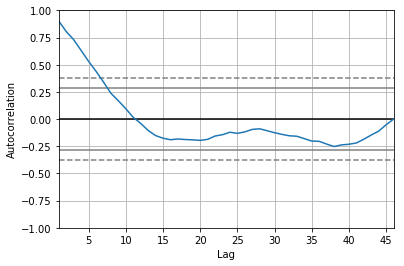

In [315]:
# generating autocorrelation graph for Amazon
autocorrelation_plot(amzn_adjClose)

In [316]:
# eliminate all Apple columns except for 'AdjClose' -- the adjusted close price of a stock
aapl_adjClose = aapl_month_end[['AdjClose']]
aapl_adjClose.head(3)

,AdjClose
Date,
2014-06-30,324.78
2014-07-31,312.99
2014-08-31,339.04


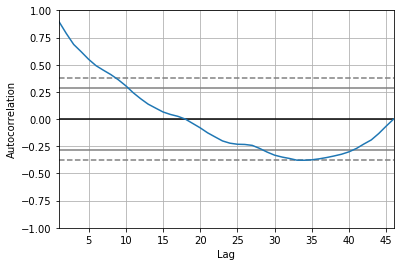

In [317]:
# generating autocorrelation graph for Apple
autocorrelation_plot(aapl_adjClose)

In [318]:
# eliminate all Intel columns except for 'AdjClose' -- the adjusted close price of a stock
intc_adjClose = intc_month_end[['AdjClose']]
intc_adjClose.head(3)

,AdjClose
Date,
2014-06-30,27.698293
2014-07-31,30.378484
2014-08-31,31.516352


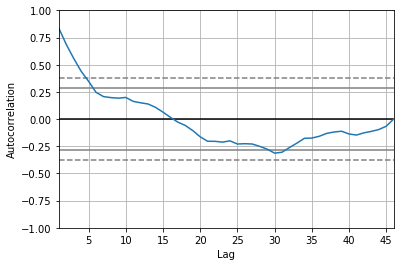

In [319]:
# generating autocorrelation graph for Intel
autocorrelation_plot(intc_adjClose)

In [320]:
# eliminate all HBC columns except for 'AdjClose' -- the adjusted close price of a stock.
# Adjust column name to match the other tables
hbc_adjClose = hbc_month_end[['Adj Close']]
hbc_adjClose.columns = ['AdjClose']
hbc_adjClose.head(3)

,AdjClose
Date,
2014-06-30,4420.27
2014-07-31,4578.14
2014-08-31,4601.82


In [321]:
# removing the excess observations seen in HBC historical stock prices
hbc_adjClose_filtered = hbc_adjClose['2014-06-30':'2018-03-31']
hbc_adjClose = hbc_adjClose_filtered
hbc_adjClose.tail(3)

,AdjClose
Date,
2018-01-31,28063.5
2018-02-28,24381.0
2018-03-31,28127.0


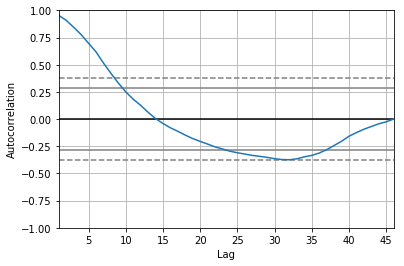

In [322]:
# generating autocorrelation graph for HBC
autocorrelation_plot(hbc_adjClose)

In [323]:
# generate Amazon monthly returns
amzn_monthly_returns = (amzn_adjClose - amzn_adjClose.shift(1)) / amzn_adjClose.shift(1)
amzn_monthly_returns.dropna().head(3)

,AdjClose
Date,
2014-07-31,0.028731
2014-08-31,0.077509
2014-09-30,-0.017073


In [324]:
# QUESTION 5 ANSWER

# With respect to monthly returns, there are no significant trends because all of the values are in-between 
# the 95% confidence interval.

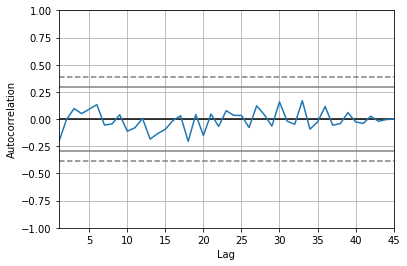

In [325]:
# generating autocorrelation graph for Amazon (monthly returns)
autocorrelation_plot(amzn_monthly_returns.dropna())

In [326]:
# generate Apple monthly returns
aapl_monthly_returns = (aapl_adjClose - aapl_adjClose.shift(1)) / aapl_adjClose.shift(1)
aapl_monthly_returns.head(3)

,AdjClose
Date,
2014-06-30,NaN
2014-07-31,-0.036301
2014-08-31,0.083229


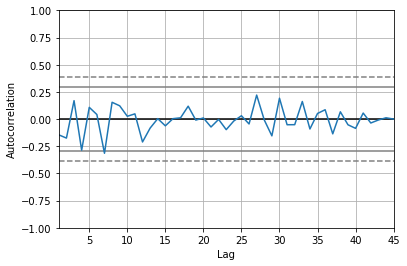

In [327]:
# generating autocorrelation graph for Apple (monthly returns)
autocorrelation_plot(aapl_monthly_returns.dropna())

In [328]:
# generate Intel monthly returns
intc_monthly_returns = (intc_adjClose - intc_adjClose.shift(1)) / intc_adjClose.shift(1)
intc_monthly_returns.head(3)

,AdjClose
Date,
2014-06-30,NaN
2014-07-31,0.096764
2014-08-31,0.037456


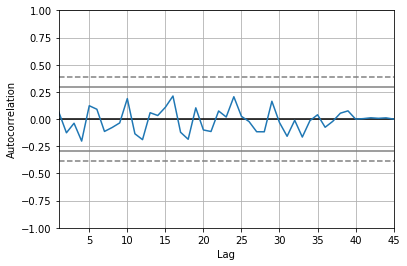

In [329]:
# generating autocorrelation graph for Intel (monthly returns)
autocorrelation_plot(intc_monthly_returns.dropna())

In [330]:
# generate HBC monthly returns
hbc_monthly_returns = (hbc_adjClose - hbc_adjClose.shift(1)) / hbc_adjClose.shift(1)
hbc_monthly_returns.head(3)

,AdjClose
Date,
2014-06-30,NaN
2014-07-31,0.035715
2014-08-31,0.005172


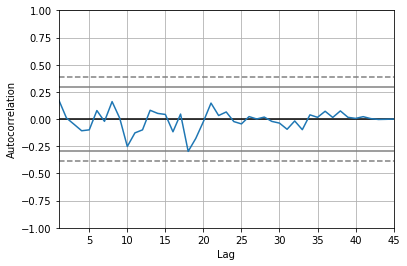

In [331]:
# generating autocorrelation graph (monthly returns)
autocorrelation_plot(hbc_monthly_returns.dropna())

In [332]:
# merge Amazon and Apple adjusted close prices into one table 
amzn_and_aapl = pd.merge(amzn_adjClose, aapl_adjClose, left_index=True, right_index=True)
amzn_and_aapl.head(3)

,AdjClose_x,AdjClose_y
Date,,
2014-06-30,87.468686,324.78
2014-07-31,89.981776,312.99
2014-08-31,96.956207,339.04


In [333]:
# continue merging adjusted close prices into one table...
amzn_and_aapl_and_intc = pd.merge(amzn_and_aapl, intc_adjClose, left_index=True, right_index=True)
amzn_and_aapl_and_intc.head(3)

,AdjClose_x,AdjClose_y,AdjClose
Date,,,
2014-06-30,87.468686,324.78,27.698293
2014-07-31,89.981776,312.99,30.378484
2014-08-31,96.956207,339.04,31.516352


In [334]:
# continue merging adjusted close prices into one table...
amzn_and_aapl_and_intc_and_hbc = pd.merge(amzn_and_aapl_and_intc, hbc_adjClose, left_index=True, right_index=True)
amzn_and_aapl_and_intc_and_hbc.head(3)

,AdjClose_x,AdjClose_y,AdjClose_x,AdjClose_y
Date,,,,
2014-06-30,87.468686,324.78,27.698293,4420.27
2014-07-31,89.981776,312.99,30.378484,4578.14
2014-08-31,96.956207,339.04,31.516352,4601.82


In [335]:
# rename columns
amzn_and_aapl_and_intc_and_hbc.columns = ['Amazon', 'Apple', 'Intel', 'HBC']
amzn_and_aapl_and_intc_and_hbc.head(3)

,Amazon,Apple,Intel,HBC
Date,,,,
2014-06-30,87.468686,324.78,27.698293,4420.27
2014-07-31,89.981776,312.99,30.378484,4578.14
2014-08-31,96.956207,339.04,31.516352,4601.82


In [336]:
# all monthly returns as one table
monthly_returns = (amzn_and_aapl_and_intc_and_hbc - amzn_and_aapl_and_intc_and_hbc.shift(1))\
                    /amzn_and_aapl_and_intc_and_hbc.shift(1)
monthly_returns.dropna().head(3)

,Amazon,Apple,Intel,HBC
Date,,,,
2014-07-31,0.028731,-0.036301,0.096764,0.035715
2014-08-31,0.077509,0.083229,0.037456,0.005172
2014-09-30,-0.017073,-0.048962,-0.002864,-0.006289


In [337]:
# QUESTION 6 ANSWER

# The scatter matrix demonstrates that each stock has a positive correlation with each stock.
# This should not be surprising considering that each of the stocks are blue-chip equities that typically increase
# in value over time. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12802c1d0>,
      dtype=object)

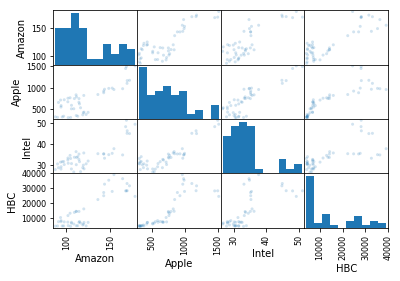

In [338]:
# generating scatter matrix of all stocks
pd.plotting.scatter_matrix(amzn_and_aapl_and_intc_and_hbc, alpha=0.2)